In [1]:
# https://scikit-learn.org/stable/

# Step 01:
KNN Regressor:

# 1. Import data set

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('weight-height.csv') # for excel pd.read_excel('file.xlsx')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Encoding the Gender column

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df.Gender=le.fit_transform(df.Gender)

In [7]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


# MinMax Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler
Mms  = MinMaxScaler()

In [9]:
df['Height'] = Mms.fit_transform(df[['Height']])

In [10]:
df.head()

,Gender,Height,Weight
0,1,0.744399,241.893563
1,1,0.548328,162.310473
2,1,0.754583,212.740856
3,1,0.662487,220.042470
4,1,0.590905,206.349801


In [11]:
df['Weight'] = Mms.fit_transform(df[['Weight']])


In [12]:
df.head()

,Gender,Height,Weight
0,1,0.744399,0.862415
1,1,0.548328,0.472703
2,1,0.754583,0.719657
3,1,0.662487,0.755412
4,1,0.590905,0.688360


# 2. Seperate x(Gender, Height) and y (y=Weight)

In [13]:
x = df[['Gender','Height']]
y = df['Weight']

In [14]:
x.head()

,Gender,Height
0,1,0.744399
1,1,0.548328
2,1,0.754583
3,1,0.662487
4,1,0.590905


In [15]:
y.head()

0    0.862415
1    0.472703
2    0.719657
3    0.755412
4    0.688360
Name: Weight, dtype: float64

# 3. Train = 70%, Test = 30%

In [16]:
from sklearn.model_selection import train_test_split as tts

# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [17]:
xtrain.head()

,Gender,Height
384,1,0.534353
345,1,0.625083
1839,1,0.405765
5864,0,0.467365
2009,1,0.638688


In [18]:
ytrain.head()

384     0.612192
345     0.653951
1839    0.482242
5864    0.450585
2009    0.670271
Name: Weight, dtype: float64

# 4. Apply Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [20]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [21]:
m = reg.coef_
m

array([0.09425273, 0.75523577])

In [22]:
c = reg.intercept_
c 

0.07728355358015654

In [23]:
pred = reg.predict(xtest)

In [24]:
pred

array([0.33728031, 0.71071782, 0.59840885, ..., 0.48489256, 0.34999412,
       0.78362367])

In [25]:
df['predicted result'] = reg.predict(x)

In [26]:
df.head()

,Gender,Height,Weight,predicted result
0,1,0.744399,0.862415,0.733733
1,1,0.548328,0.472703,0.585654
2,1,0.754583,0.719657,0.741424
3,1,0.662487,0.755412,0.671870
4,1,0.590905,0.688360,0.617809


#  Evaluate Model (Accuracy, MSE, Prediction)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
mse = mean_squared_error(ytest, pred)

In [29]:
mse

0.0024099301413839564

In [30]:
mae = mean_absolute_error(ytest, pred)

In [31]:
mae

0.03905118572530378

In [32]:
reg.score(xtest, ytest)

0.9020866705270623

# 6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [33]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)

In [34]:
neigh.fit(xtest,ytest)

KNeighborsRegressor(n_neighbors=7)

In [35]:
pred1 = neigh.predict(xtest)
pred1

array([0.2888116 , 0.72259997, 0.58971792, ..., 0.46222395, 0.37530266,
       0.76643094])

In [36]:
df['Predicted_Result2'] = neigh.predict(x)

In [37]:
df.head()

,Gender,Height,Weight,predicted result,Predicted_Result2
0,1,0.744399,0.862415,0.733733,0.790026
1,1,0.548328,0.472703,0.585654,0.584967
2,1,0.754583,0.719657,0.741424,0.758089
3,1,0.662487,0.755412,0.671870,0.700541
4,1,0.590905,0.688360,0.617809,0.653253


# 7. Evaluate Model (Accuracy, MSE, Prediction)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae1 = mean_absolute_error (ytest,pred1)
mse1 = mean_squared_error (ytest,pred1)

In [39]:
mse1

0.0021058633348084495

In [40]:
mae1

0.03660015760992311

In [41]:
neigh.score(xtest, ytest)

0.9144406358569097

# Opinion
KNN Regression is better than Linear Regression, Because knn regression provide higher accuracy and lower loss than Linear Regression.

# Step 02:
KNN Classifier:

In [42]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings as w
w.filterwarnings('ignore')


# 1. Import data set

In [43]:
df_bc=pd.read_csv ('Breast Cancer.csv')

In [44]:
df_bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
df_bc.drop(['id','Unnamed: 32'], axis=1, inplace= True)

In [46]:
df_bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
df_bc.diagnosis=le.fit_transform(df_bc.diagnosis)

In [49]:
df_bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2. Seperate x and y (y=diagnosis)

In [50]:
x = df_bc.drop(['diagnosis'], axis=1)

In [51]:
y = df_bc[['diagnosis']]

In [52]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


# 3. Train = 70%, Test = 30%

In [54]:
from sklearn.model_selection import train_test_split as tts 
x_train, x_test, y_train, y_test = tts(x,y,test_size=.30)

In [55]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
196,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,0.1834,0.06877,...,16.39,34.01,111.60,806.9,0.1737,0.3122,0.3809,0.1673,0.3080,0.09333
480,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,0.06284,...,13.34,27.87,88.83,547.4,0.1208,0.2279,0.1620,0.0569,0.2406,0.07729
43,13.28,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,0.1974,0.06782,...,17.38,28.00,113.10,907.2,0.1530,0.3724,0.3664,0.1492,0.3739,0.10270
209,15.27,12.91,98.17,725.5,0.08182,0.06230,0.05892,0.03157,0.1359,0.05526,...,17.38,15.92,113.70,932.7,0.1222,0.2186,0.2962,0.1035,0.2320,0.07474
329,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,17.73,25.21,113.70,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953


In [56]:
y_train.head()

,diagnosis
196,1
480,0
43,1
209,0
329,1


# MinMax Normalization

In [57]:
from sklearn.preprocessing import MinMaxScaler
Mms  = MinMaxScaler()

In [58]:
x_train_Mms = Mms.fit_transform(x_train)
x_test_Mms = Mms.fit_transform(x_test)

In [59]:
x_train_Mms

array([[0.32131194, 0.42543118, 0.32368185, ..., 0.60703919, 0.37925852,
        0.25011494],
       [0.24511335, 0.28136625, 0.23840785, ..., 0.20645864, 0.21042084,
        0.1447619 ],
       [0.29812107, 0.35745688, 0.30080851, ..., 0.5413643 , 0.54433868,
        0.31165846],
       ...,
       [0.57215202, 0.51065269, 0.58399558, ..., 0.90457184, 0.77755511,
        0.31888342],
       [0.13280326, 0.34595874, 0.12659802, ..., 0.08639332, 0.09218437,
        0.22745484],
       [0.35728146, 0.32566791, 0.34869739, ..., 0.34811321, 0.22670341,
        0.12729064]])

In [60]:
x_test_Mms

array([[0.72902048, 0.43918054, 0.70120169, ..., 0.55429553, 0.32623694,
        0.07477111],
       [0.70734212, 0.57533077, 0.70120169, ..., 0.66082474, 0.34082397,
        0.33613089],
       [0.31656113, 0.41613316, 0.31284508, ..., 0.46632302, 0.25231618,
        0.59223466],
       ...,
       [0.06771636, 0.21809646, 0.06820396, ..., 0.16364261, 0.17129903,
        0.16336046],
       [0.30286953, 0.48826291, 0.31796038, ..., 0.70790378, 0.55450424,
        0.44218379],
       [0.32968224, 0.15706359, 0.31649886, ..., 0.45876289, 0.32761679,
        0.32400814]])

# 4. Apply KNN Classifier 

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_neigh = KNeighborsClassifier(n_neighbors=7)
knn_neigh.fit(x_train_Mms, y_train)

KNeighborsClassifier(n_neighbors=7)

In [62]:
knn_pred =knn_neigh.predict(x_test_Mms)

In [63]:
knn_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [64]:
df_bc['predicted_result'] =knn_neigh.predict(x)


In [65]:
df_bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predicted_result
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# 5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

In [66]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve


In [67]:
classification_report(y_test, knn_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95       106\n           1       0.92      0.92      0.92        65\n\n    accuracy                           0.94       171\n   macro avg       0.94      0.94      0.94       171\nweighted avg       0.94      0.94      0.94       171\n'

In [68]:
print (classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.92      0.92      0.92        65

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [69]:
cm = confusion_matrix(y_test,knn_pred)
cm

array([[101,   5],
       [  5,  60]])

In [70]:
import pandas as pd #data frame
import seaborn as sns # analysis / visualization
from matplotlib import pyplot as plt  # ploting
import numpy as np       # linear algebra calculation
from sklearn.model_selection import train_test_split as tts  # data spliting
from sklearn.tree import DecisionTreeClassifier # decision tree algoritm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

import warnings as w
w.filterwarnings('ignore')


Text(0.5, 1.0, 'Confusion Matrix')

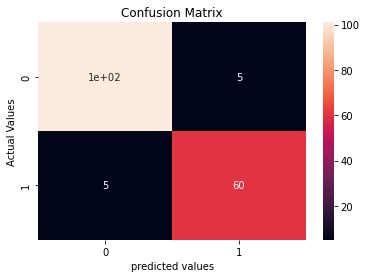

In [71]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [72]:
knn_neigh.score(x_test_Mms, y_test)

0.9415204678362573

In [73]:
from sklearn.metrics import plot_roc_curve

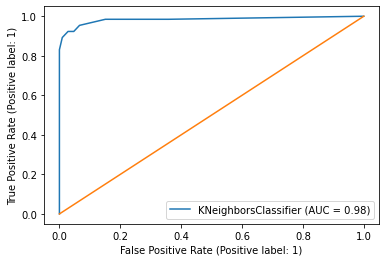

In [74]:
plot_roc_curve(knn_neigh, x_test_Mms, y_test)
plt.plot([0,1],[0,1])

In [75]:
knn_neigh.score(x_test_Mms, y_test)


0.9415204678362573

In [76]:
from numpy.ma.core import reshape
tp, fn, tn, fp =  confusion_matrix(y_test, knn_pred).reshape(-1)

In [77]:
tp

101

In [78]:
fn

5

In [79]:
tn

5

In [80]:
fp

60

In [81]:
# accuracy
(tp+tn) / (tp+tn+fp+fn)

0.6198830409356725

# 7. Compare the model with decision tree classifier

# Decision Tree

In [82]:
from sklearn import tree
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()

In [83]:
dclf.fit(x_train_Mms,y_train)


DecisionTreeClassifier()

In [84]:
d_pred = dclf.predict(x_test_Mms)
d_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

[Text(0.6666666666666666, 0.9166666666666666, 'X[20] <= 0.315\ngini = 0.466\nsamples = 398\nvalue = [251, 147]'),
 Text(0.42857142857142855, 0.75, 'X[27] <= 0.489\ngini = 0.128\nsamples = 262\nvalue = [244, 18]'),
 Text(0.23809523809523808, 0.5833333333333334, 'X[13] <= 0.059\ngini = 0.025\nsamples = 236\nvalue = [233, 3]'),
 Text(0.14285714285714285, 0.4166666666666667, 'X[14] <= 0.054\ngini = 0.009\nsamples = 228\nvalue = [227, 1]'),
 Text(0.09523809523809523, 0.25, 'X[23] <= 0.136\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.047619047619047616, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 224\nvalue = [224, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[19] <= 0.129\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.2857142857142857, 0.25, 'X[9] <= 0.117\ngini = 0.444\nsamples = 3\nvalue = [1, 2]')

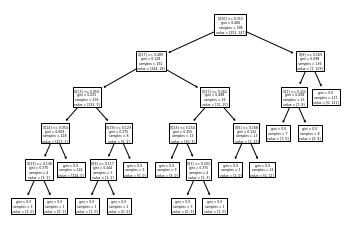

In [85]:
tree.plot_tree(dclf)

[Text(0.6666666666666666, 0.9166666666666666, 'radius_worst <= 0.315\ngini = 0.466\nsamples = 398\nvalue = [251, 147]'),
 Text(0.42857142857142855, 0.75, 'concave points_worst <= 0.489\ngini = 0.128\nsamples = 262\nvalue = [244, 18]'),
 Text(0.23809523809523808, 0.5833333333333334, 'area_se <= 0.059\ngini = 0.025\nsamples = 236\nvalue = [233, 3]'),
 Text(0.14285714285714285, 0.4166666666666667, 'smoothness_se <= 0.054\ngini = 0.009\nsamples = 228\nvalue = [227, 1]'),
 Text(0.09523809523809523, 0.25, 'area_worst <= 0.136\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.047619047619047616, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 224\nvalue = [224, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'fractal_dimension_se <= 0.129\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.2857142857142857, 0.25, 'fracta

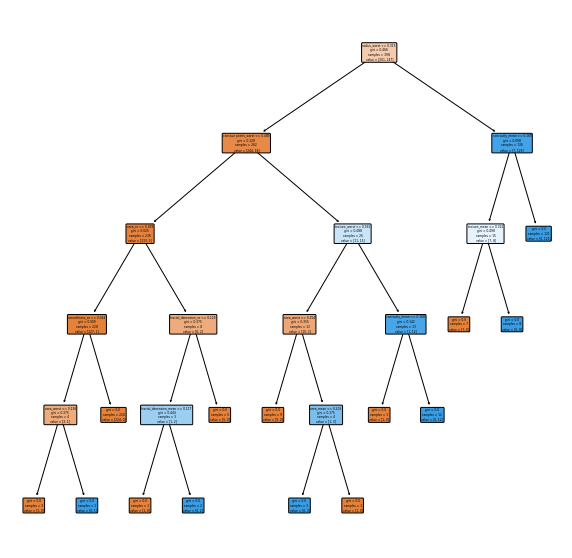

In [86]:
pyplot.figure(figsize=(10,10))
tree.plot_tree(dclf, filled=True, rounded=True, feature_names=x.columns)

In [87]:
df_bc['decisionTree_predicted_result'] = dclf.predict(x)


In [88]:
df_bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predicted_result,decisionTree_predicted_result
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1,1
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1,1
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1,1
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1,1
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1,1
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1,1


In [89]:
classification_report(y_test, d_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.63      0.76       106\n           1       0.61      0.95      0.75        65\n\n    accuracy                           0.75       171\n   macro avg       0.79      0.79      0.75       171\nweighted avg       0.83      0.75      0.76       171\n'

In [90]:
print (classification_report(y_test, d_pred))


              precision    recall  f1-score   support

           0       0.96      0.63      0.76       106
           1       0.61      0.95      0.75        65

    accuracy                           0.75       171
   macro avg       0.79      0.79      0.75       171
weighted avg       0.83      0.75      0.76       171



In [91]:
cm = confusion_matrix(y_test,d_pred)
cm

array([[67, 39],
       [ 3, 62]])

Text(0.5, 1.0, 'Confusion Matrix')

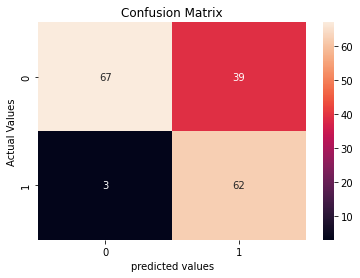

In [92]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [93]:
dclf.score(x_test_Mms, y_test)


0.7543859649122807

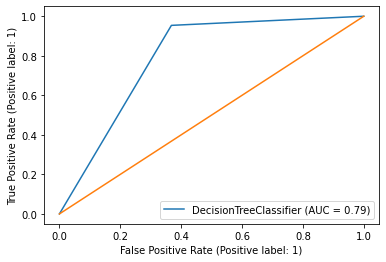

In [94]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dclf, x_test_Mms, y_test)
plt.plot([0,1],[0,1])

In [95]:
dclf.score(x_test_Mms, y_test)


0.7543859649122807

In [96]:
from numpy.ma.core import reshape
tp, fn, tn, fp =  confusion_matrix(y_test, d_pred).reshape(-1)

In [97]:
tp

67

In [98]:
tn

3

In [99]:
fp

62

In [100]:
fn

39

In [101]:
#accuracy
(tp+tn)/(tp+fp+tn+fn)

0.4093567251461988

# Opinion
Here, Knn classifier provide better auc curve and better accuracy than decision tree .